### Fetch the data

In [1]:
import pandas as pd
ames_housing = pd.read_csv("https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


### Categorize the data

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars","WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

### Fit a Linear Regression

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), SimpleImputer(), LinearRegression())
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)


In [4]:
cv_results

{'fit_time': array([0.59621024, 0.03124118, 0.01562023, 0.01562166, 0.01562071,
        0.01562047, 0.01562357, 0.01562023, 0.01562238, 0.01705027]),
 'score_time': array([0.01562214, 0.01562238, 0.        , 0.01562047, 0.01562214,
        0.        , 0.01562047, 0.        , 0.        , 0.01579404]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('simpleimputer', SimpleImputer()),
                  ('linearregression', LinearRegression())]

In [5]:
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1252.841254,470.799889,6139.338820,-1.802227e+18,-6.752622e+17,-1.847284e+18,1.065386e+04,-6.662628e+17,-7.689820e+17,-8.799781e+16,...,10047.913177,1584.483442,15169.539960,3710.001509,1483.716150,-3404.830142,294.445521,743.549561,-2422.359326,-1074.236876
max,3157.618428,3873.207912,7802.629781,8.736445e+03,3.665414e+02,3.647375e+03,1.739380e+18,1.113368e+04,1.279056e+04,-1.284447e+03,...,13846.582344,3793.148315,19972.952782,5783.768925,3014.716614,-2135.759874,1718.529601,2173.149156,-381.454537,714.989069


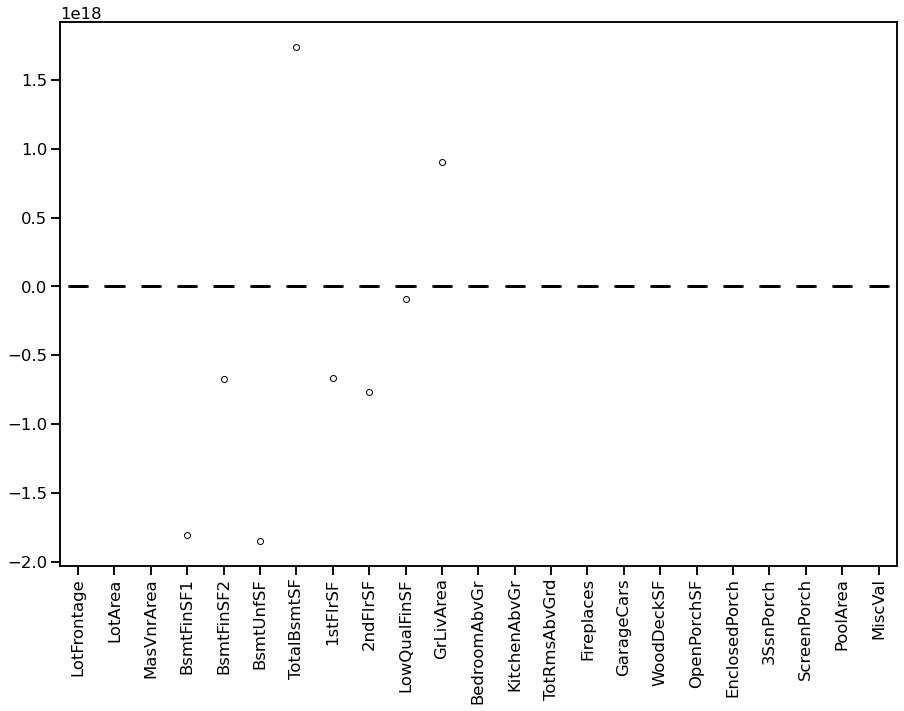

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

The order of magnitude of the extremum weight values over all the features is 1e18

The two most important features used by the ridge regressor are "TotalBsmtSF" and "GrLivArea"

Repeat the same experiment by fitting a ridge regressor with the alpha being tuned and default parameters

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

import numpy as np
alphas=np.logspace(-1, 3, num=30)

model = make_pipeline(StandardScaler(), SimpleImputer(), RidgeCV(alphas=alphas,store_cv_values=True))
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)

In [8]:
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,433.614615,985.592457,6861.123401,6977.487430,-818.340486,2365.398633,10253.752513,8300.684682,8901.508095,-2229.938030,...,8195.446573,2522.263018,15371.593237,3523.134304,2631.632867,-3133.694616,91.922177,669.965009,-1428.570752,-1067.791850
max,3274.916770,2612.049560,8289.482591,10829.688194,-19.986824,3914.097504,15106.362610,9667.359048,12820.325604,-1065.921174,...,11687.738785,5554.818682,17383.869303,5975.817068,3976.131460,-2126.804232,1572.032530,1997.863437,7.808576,606.637166


The order of magnitude of the extremum weight values over all the features is 1e4


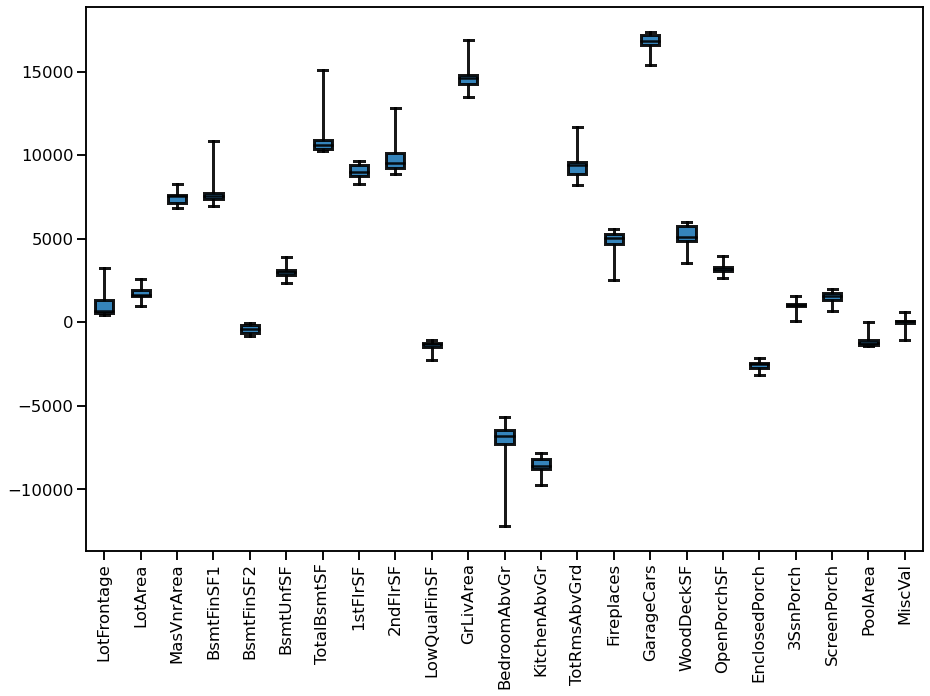

In [9]:
sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

The two most important features used by the ridge regressor are "GarageCars" and "GrLivArea"

In [10]:
mse_alphas = [est[-1].cv_values_.mean(axis=0)
              for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas

,0.100000,0.137382,0.188739,0.259294,0.356225,0.489390,0.672336,0.923671,1.268961,1.743329,...,57.361525,78.804628,108.263673,148.735211,204.335972,280.721620,385.662042,529.831691,727.895384,1000.000000
0,2.057667e+09,2.057646e+09,2.057617e+09,2.057577e+09,2.057522e+09,2.057446e+09,2.057342e+09,2.057200e+09,2.057005e+09,2.056738e+09,...,2.031165e+09,2.023794e+09,2.015410e+09,2.006603e+09,1.998538e+09,1.993146e+09,1.993325e+09,2.003116e+09,2.027893e+09,2.074580e+09
1,2.060912e+09,2.060889e+09,2.060858e+09,2.060816e+09,2.060757e+09,2.060678e+09,2.060568e+09,2.060417e+09,2.060211e+09,2.059929e+09,...,2.032876e+09,2.025053e+09,2.016119e+09,2.006655e+09,1.997815e+09,1.991515e+09,1.990616e+09,1.999086e+09,2.022169e+09,2.066575e+09
2,2.039995e+09,2.039974e+09,2.039945e+09,2.039906e+09,2.039852e+09,2.039778e+09,2.039677e+09,2.039537e+09,2.039347e+09,2.039086e+09,...,2.014410e+09,2.007437e+09,1.999612e+09,1.991569e+09,1.984502e+09,1.980334e+09,1.981883e+09,1.992999e+09,2.018729e+09,2.065522e+09
3,1.928549e+09,1.928527e+09,1.928497e+09,1.928455e+09,1.928398e+09,1.928320e+09,1.928212e+09,1.928065e+09,1.927863e+09,1.927587e+09,...,1.901210e+09,1.893649e+09,1.885084e+09,1.876142e+09,1.868025e+09,1.862695e+09,1.863035e+09,1.873005e+09,1.897829e+09,1.944233e+09
4,1.958794e+09,1.958773e+09,1.958746e+09,1.958708e+09,1.958655e+09,1.958584e+09,1.958485e+09,1.958350e+09,1.958165e+09,1.957911e+09,...,1.933617e+09,1.926601e+09,1.918605e+09,1.910183e+09,1.902426e+09,1.897156e+09,1.897108e+09,1.906091e+09,1.929144e+09,1.972709e+09
5,2.044033e+09,2.044011e+09,2.043981e+09,2.043939e+09,2.043881e+09,2.043802e+09,2.043694e+09,2.043546e+09,2.043342e+09,2.043063e+09,...,2.016320e+09,2.008593e+09,1.999788e+09,1.990512e+09,1.981946e+09,1.976038e+09,1.975664e+09,1.984773e+09,2.008543e+09,2.053597e+09
6,2.030932e+09,2.030911e+09,2.030883e+09,2.030843e+09,2.030790e+09,2.030716e+09,2.030615e+09,2.030476e+09,2.030286e+09,2.030025e+09,...,2.005282e+09,1.998242e+09,1.990310e+09,1.982108e+09,1.974822e+09,1.970386e+09,1.971644e+09,1.982498e+09,2.008080e+09,2.054972e+09
7,2.007722e+09,2.007702e+09,2.007675e+09,2.007637e+09,2.007586e+09,2.007515e+09,2.007419e+09,2.007286e+09,2.007105e+09,2.006856e+09,...,1.983156e+09,1.976373e+09,1.968700e+09,1.960721e+09,1.953569e+09,1.949127e+09,1.950227e+09,1.960843e+09,1.986303e+09,2.033517e+09
8,1.377518e+09,1.377512e+09,1.377505e+09,1.377494e+09,1.377480e+09,1.377460e+09,1.377433e+09,1.377396e+09,1.377345e+09,1.377276e+09,...,1.373219e+09,1.373291e+09,1.374443e+09,1.377574e+09,1.384024e+09,1.395673e+09,1.415072e+09,1.445620e+09,1.491864e+09,1.559910e+09
9,2.088815e+09,2.088793e+09,2.088762e+09,2.088720e+09,2.088662e+09,2.088582e+09,2.088473e+09,2.088323e+09,2.088117e+09,2.087836e+09,...,2.061014e+09,2.053304e+09,2.044522e+09,2.035252e+09,2.026631e+09,2.020539e+09,2.019776e+09,2.028238e+09,2.051119e+09,2.095166e+09


In [11]:
x=cv_alphas.columns

for i in x:
    print(i)

0.1
0.1373823795883263
0.18873918221350972
0.2592943797404667
0.3562247890262442
0.4893900918477494
0.6723357536499337
0.9236708571873861
1.2689610031679222
1.743328822199988
2.395026619987486
3.2903445623126677
4.520353656360243
6.2101694189156165
8.531678524172806
11.721022975334806
16.102620275609393
22.12216291070448
30.39195382313198
41.753189365604
57.361525104486816
78.80462815669912
108.2636733874054
148.73521072935117
204.33597178569417
280.72162039411756
385.6620421163472
529.8316906283708
727.8953843983146
1000.0


### Working with numerical data only

In [12]:
adult_census = pd.read_csv("https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [13]:
data.isnull().sum()

age               0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression()
)


from sklearn.model_selection import cross_validate
cv_results = cross_validate(
    logistic_regression, data, target, cv=10,return_estimator=True)

cv_results

{'fit_time': array([0.34555197, 0.28513026, 0.31687737, 0.31502724, 0.26978898,
        0.30682588, 0.28572226, 0.26822591, 0.25667143, 0.30407381]),
 'score_time': array([0.033638  , 0.03510141, 0.04173613, 0.04838204, 0.03413701,
        0.0156219 , 0.03658557, 0.01562333, 0.03268242, 0.01567578]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  (

In [15]:
array=cv_results["test_score"]
array.mean()

0.7998445658834604

In [16]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(data, target)
dummy_clf.predict(data)
dummy_clf.score(data, target)

0.7607182343065395

In [17]:
cv_results["estimator"]

[Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', Stan

In [22]:
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs,columns=data.columns)
coefs.describe().loc[["min", "max"]]

,age,capital-gain,capital-loss,hours-per-week
min,0.516454,2.405087,0.301394,0.534597
max,0.526067,2.512010,0.309170,0.546715


<AxesSubplot:>

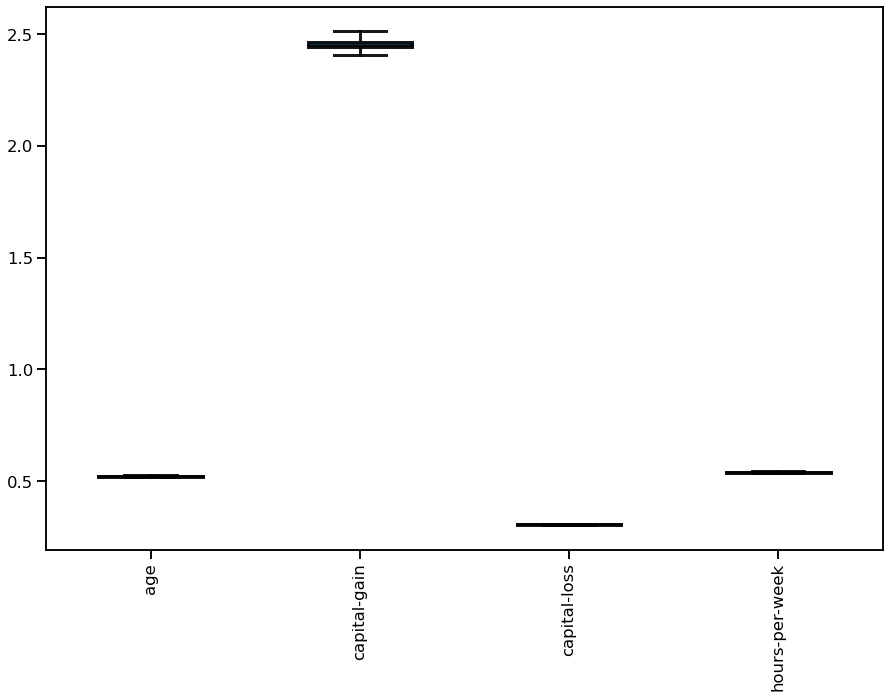

In [23]:
_, ax = plt.subplots(figsize=(15, 10))
coefs.abs().plot.box(**boxplot_property, ax=ax)

### Working with both numerical and categorical data

In [24]:
adult_census = pd.read_csv("https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [25]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country'],
      dtype='object')

In [26]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [28]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)])

In [29]:
logistic_regression = make_pipeline(
    preprocessor, LogisticRegression()
)


from sklearn.model_selection import cross_validate
cv_results = cross_validate(
    logistic_regression, data, target, cv=10,return_estimator=True)

cv_results

C:\Users\ianmo\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ianmo\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

{'fit_time': array([1.28569341, 1.33217072, 1.27320957, 1.22771621, 1.20109391,
        1.2817347 , 1.27277827, 1.22829843, 1.24013782, 1.25156808]),
 'score_time': array([0.0609479 , 0.04067945, 0.05886745, 0.05512047, 0.04702425,
        0.04197812, 0.04920697, 0.06249094, 0.04818058, 0.06249928]),
 'estimator': [Pipeline(steps=[('columntransformer',
                   ColumnTransformer(transformers=[('one-hot-encoder',
                                                    OneHotEncoder(handle_unknown='ignore'),
                                                    ['workclass', 'education',
                                                     'marital-status',
                                                     'occupation', 'relationship',
                                                     'race', 'sex',
                                                     'native-country']),
                                                   ('standard-scaler',
                                     

In [30]:
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.852 +/- 0.003


In [35]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["one-hot-encoder"]
                             .get_feature_names(categorical_columns)).tolist()
feature_names += numerical_columns

In [49]:
coefs = [estimator[1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)
coefs

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,capital-gain,capital-loss,hours-per-week
0,-0.288476,0.522380,-0.156673,-0.087365,0.014018,0.168799,-0.528043,-0.337185,-0.515919,-0.902873,...,0.068638,-0.428729,-0.612906,0.328105,-0.723659,0.625738,0.331637,2.365760,0.257836,0.354048
1,-0.277716,0.491571,-0.115764,-0.084488,0.013633,0.151686,-0.498170,-0.287876,-0.594171,-0.929286,...,0.050488,-0.392888,-0.419316,0.260503,-0.780220,0.395724,0.336567,2.308917,0.260789,0.355142
2,-0.288210,0.508062,-0.129861,-0.081910,0.044790,0.201426,-0.490183,-0.275750,-0.696305,-0.948964,...,0.017844,-0.482849,-0.562681,0.343402,-0.915839,0.761377,0.338463,2.344578,0.261622,0.358381
3,-0.324168,0.474384,-0.113163,-0.077778,0.007212,0.150068,-0.524790,-0.277578,-0.500947,-0.897373,...,0.070310,-0.374040,-0.346517,0.285843,-0.907639,0.667584,0.336110,2.357924,0.258284,0.352146
4,-0.329039,0.516980,-0.110087,-0.075309,0.018788,0.143138,-0.530463,-0.303585,-0.511290,-0.989308,...,0.220079,-0.455603,-0.592302,0.265375,-0.891625,0.367075,0.332734,2.411452,0.263779,0.358737
5,-0.308530,0.505367,-0.152913,-0.077509,0.021298,0.188066,-0.562892,-0.301514,-0.528019,-0.978305,...,0.051889,-0.490763,-0.526174,0.293443,-0.760472,0.389341,0.343721,2.352127,0.255818,0.361820
6,-0.317885,0.511719,-0.149044,-0.076345,0.003988,0.134843,-0.556367,-0.309015,-0.467340,-0.892641,...,-0.098189,-0.412967,-0.709679,0.304561,-0.811703,0.600154,0.333826,2.357410,0.256563,0.355447
7,-0.311209,0.464213,-0.124506,-0.084856,-0.015176,0.116814,-0.541324,-0.316462,-0.378773,-0.926984,...,-0.518005,-0.599295,0.319390,-0.758022,0.691013,0.337999,2.343513,0.261874,0.351009,NaN
8,-0.314481,0.487258,-0.124938,-0.081031,0.003004,0.164439,-0.523797,-0.350536,-0.426814,-0.999487,...,0.142315,-0.496764,-0.454028,0.293337,-1.043678,0.592473,0.327134,2.291995,0.264790,0.352144
9,-0.363708,0.459578,-0.174287,-0.013792,-0.020274,0.123255,-0.556979,-0.311412,-0.324498,-0.847580,...,0.043561,-0.482257,-0.846232,0.310998,-0.822007,0.806608,0.337395,2.346404,0.256801,0.351873


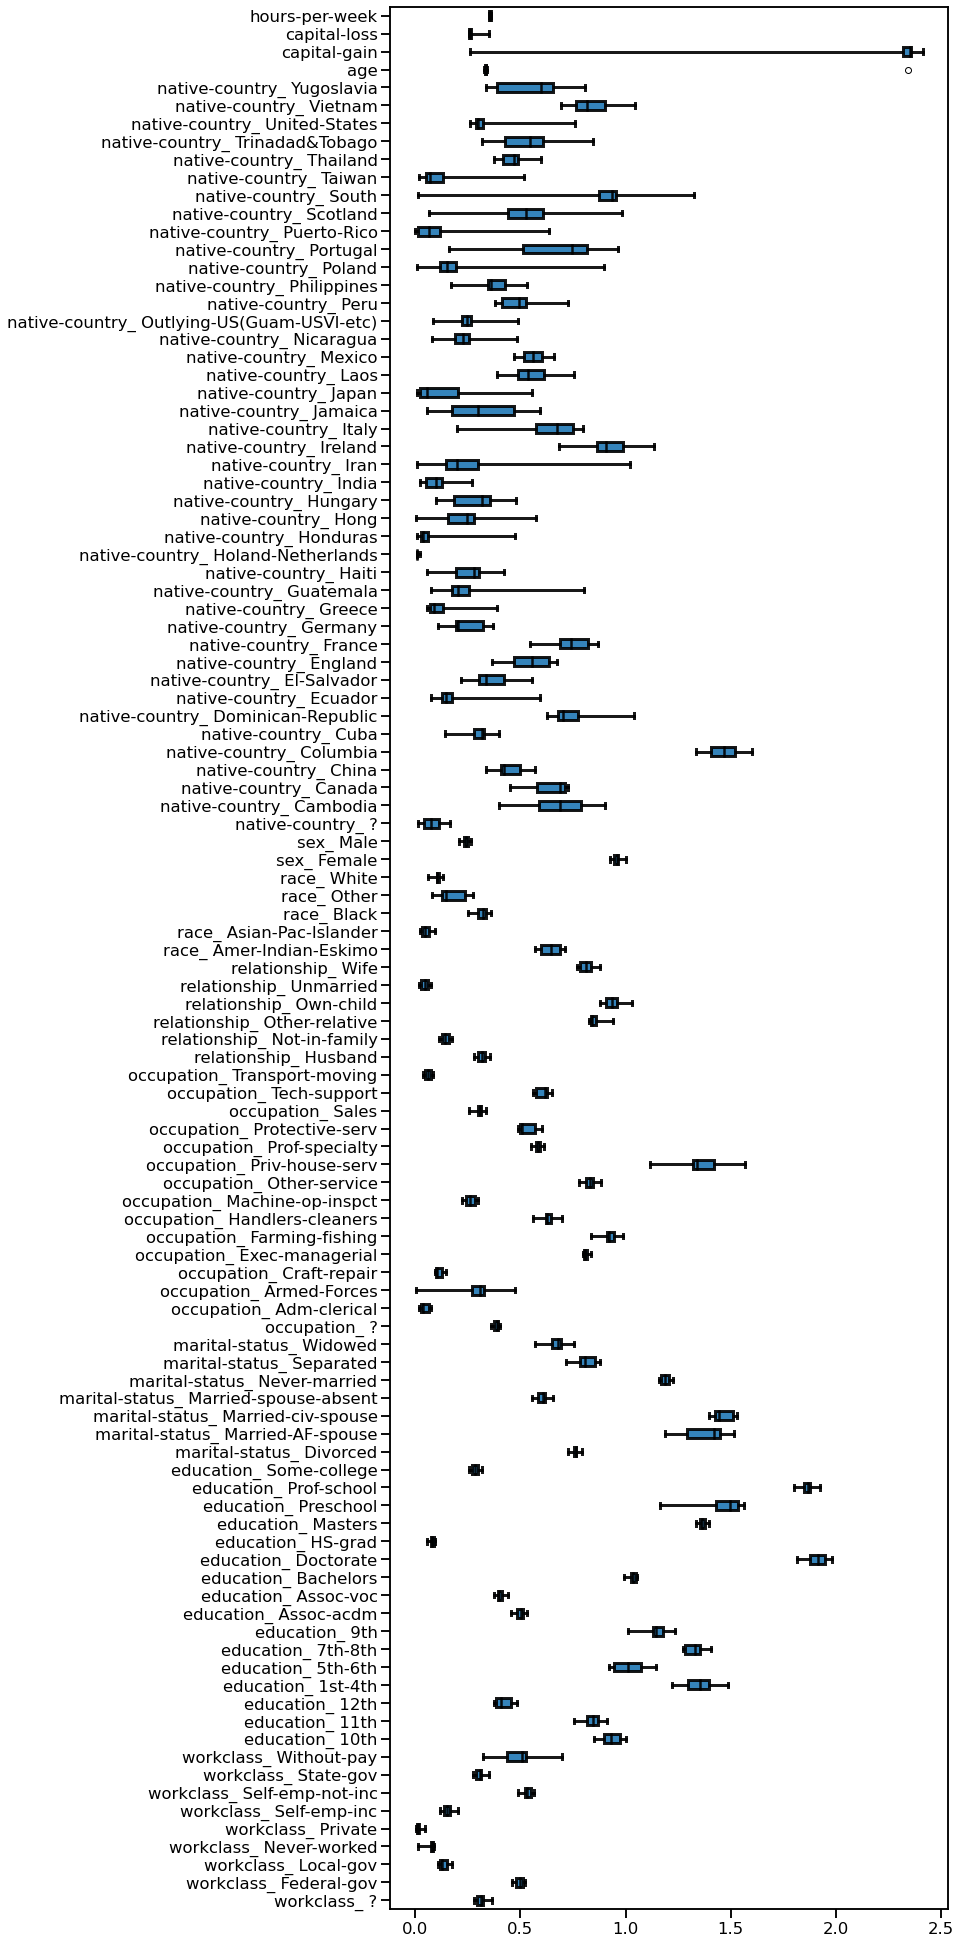

In [51]:
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

The two most important features used by the ridge regressor are "capital-gain" and "education_Doctorate"